<a href="https://colab.research.google.com/github/Shufen-Yin/Data_Portfolio/blob/main/Monthly_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis: Monthly Sales Insights

## Project Overview

This notebook demonstrates **retail sales data analysis** using Python.  
The goal is to explore **monthly sales trends**, identify **top products and categories**, analyze **regional performance**, and calculate **Month-over-Month (MoM) and Year-over-Year (YoY) growth**.

The analysis is designed to be **Colab-ready**, so users can upload their own CSV file or use the included dataset and reproduce all results.  
All visualizations are generated using **Matplotlib** and **Seaborn**, providing actionable business insights.


In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set_style("whitegrid")
%matplotlib inline


In [14]:
# Step 1 — Load Dataset
df = pd.read_csv("Superstore.csv")

# Quick preview
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [16]:
# Step 2 — Data Cleaning / Preprocessing
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Drop rows with missing 'Sales' or 'Category'
df = df.dropna(subset=['Sales', 'Category'])

# Fill missing postal codes with 0 (optional)
df['Postal Code'] = df['Postal Code'].fillna(0)



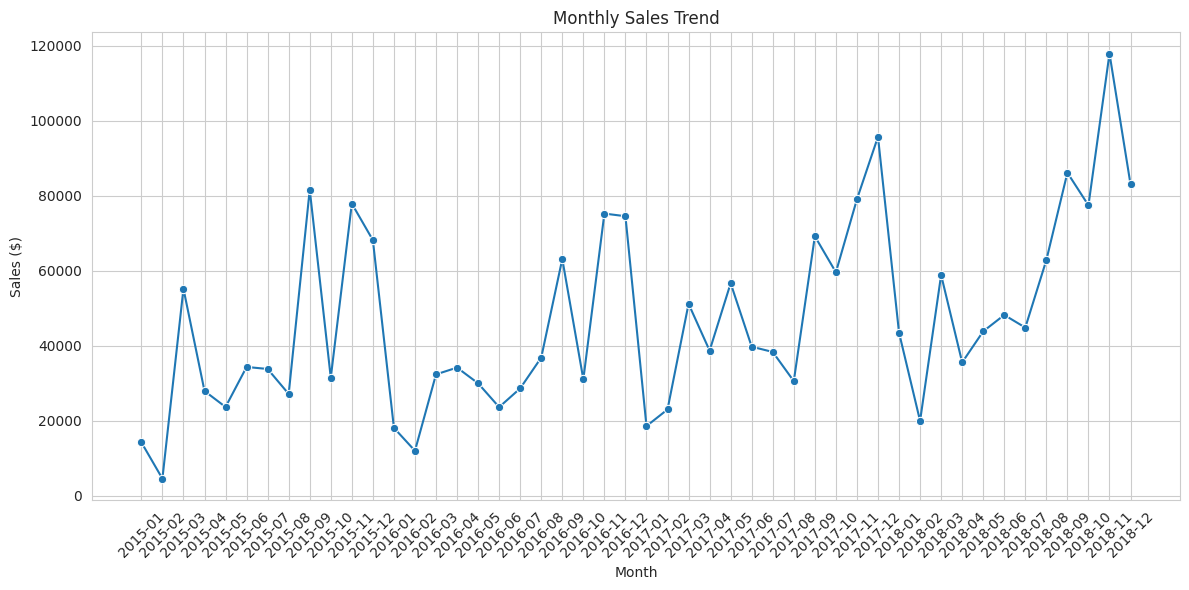

In [17]:
# Step 3 — Monthly Sales Aggregation
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


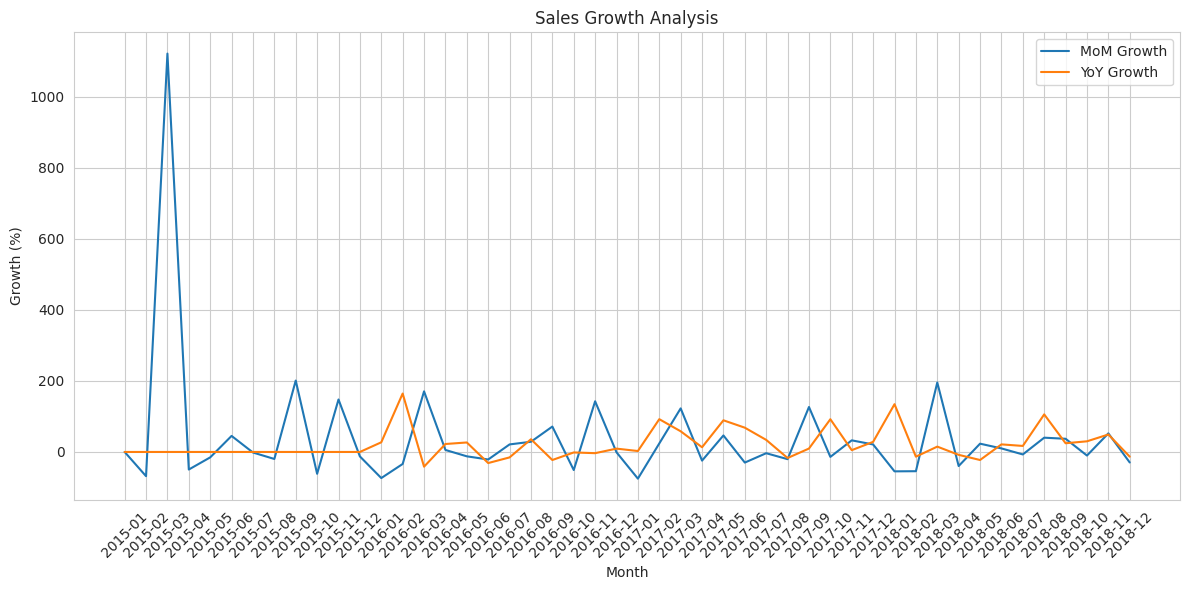

In [19]:
# Step 4 — Month-over-Month (MoM) and Year-over-Year (YoY) Growth
monthly_sales['Sales_prev_month'] = monthly_sales['Sales'].shift(1)
monthly_sales['MoM_Growth'] = (monthly_sales['Sales'] - monthly_sales['Sales_prev_month']) / monthly_sales['Sales_prev_month'] * 100

monthly_sales['Sales_prev_year'] = monthly_sales['Sales'].shift(12)
monthly_sales['YoY_Growth'] = (monthly_sales['Sales'] - monthly_sales['Sales_prev_year']) / monthly_sales['Sales_prev_year'] * 100

monthly_sales.fillna(0, inplace=True)

# Plot MoM and YoY growth
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='MoM_Growth', data=monthly_sales, label='MoM Growth')
sns.lineplot(x='YearMonth', y='YoY_Growth', data=monthly_sales, label='YoY Growth')
plt.xticks(rotation=45)
plt.title("Sales Growth Analysis")
plt.ylabel("Growth (%)")
plt.xlabel("Month")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-3202141022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


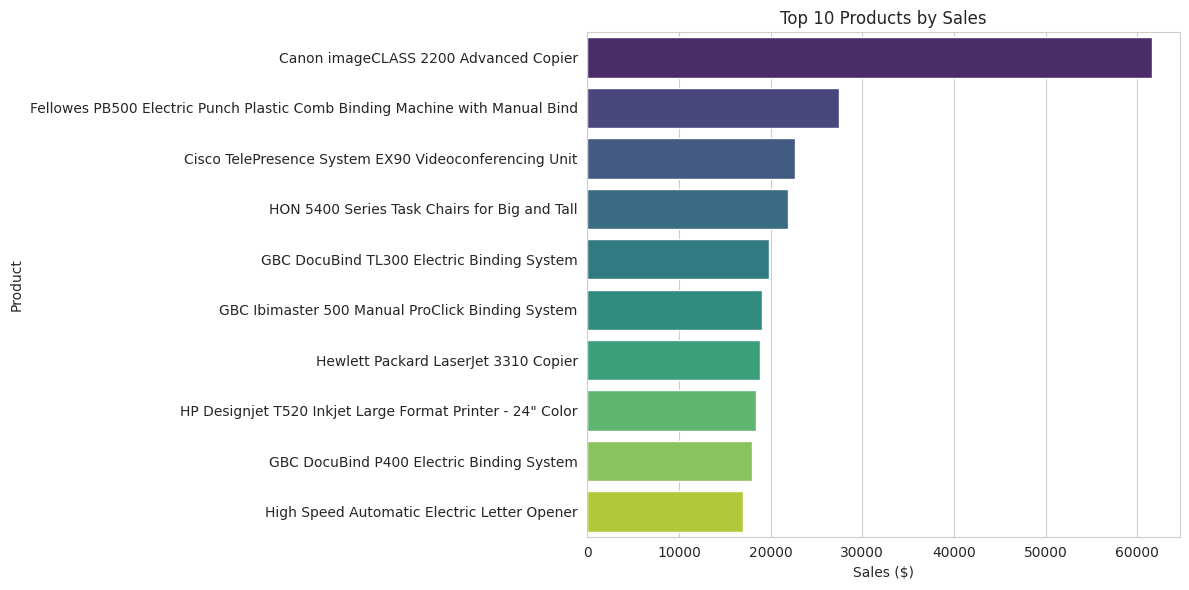

/tmp/ipython-input-3202141022.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')


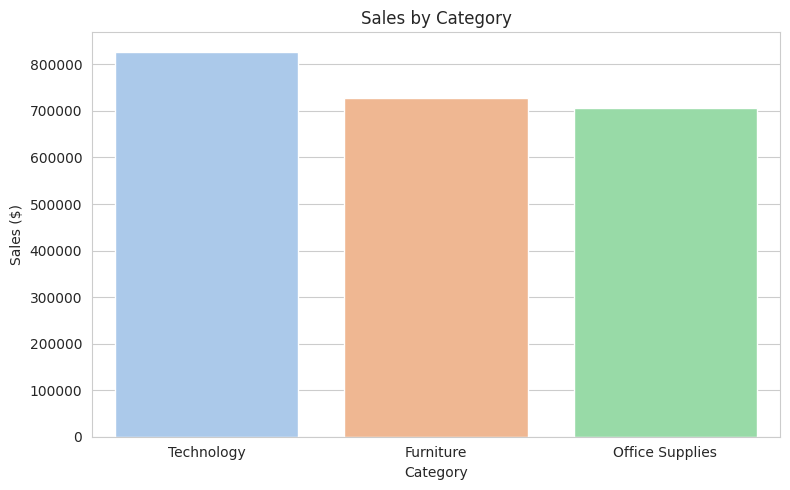

In [20]:
# Step 5 — Top Products and Categories
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Top 10 products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# Category sales
plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1782028236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_region.index, y=sales_region.values, palette='coolwarm')


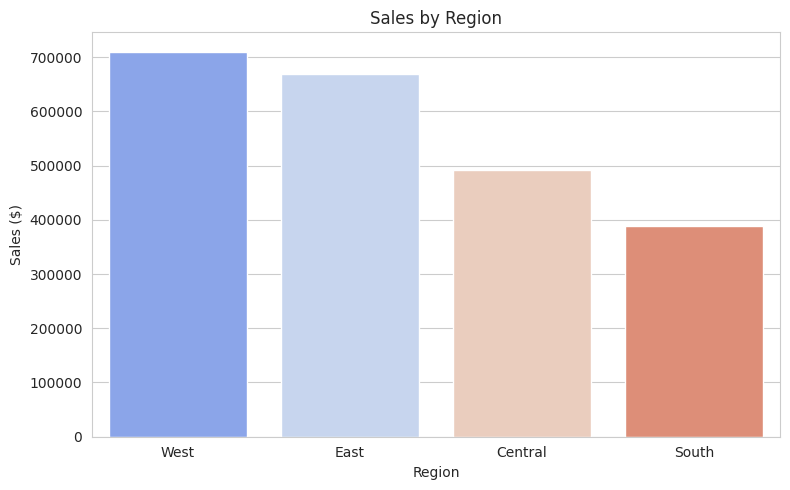

In [21]:
# Step 6 — Sales by Region
if 'Region' in df.columns:
    sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=sales_region.index, y=sales_region.values, palette='coolwarm')
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Sales ($)")
    plt.tight_layout()
    plt.show()


# Step 7 — Insights & Recommendations (Markdown Cell)
"""
### Key Insights
1. Monthly sales trend shows seasonal peaks and dips.
2. Top 10 products contribute the majority of revenue.
3. Certain categories or regions underperform and may require attention.

### Recommendations
- Focus marketing and inventory management on top products.
- Investigate low-performing regions and categories.
- Plan promotions around seasonal peaks to boost revenue.
"""
